<a href="https://colab.research.google.com/github/ajnaik44/Assignment/blob/main/DS522_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the three CSV files into separate dataframes
df1 = pd.read_csv('WHO-COVID-19-global-data_1.csv')
df2 = pd.read_csv('WHO-COVID-19-global-data_2.csv')
df3 = pd.read_csv('WHO-COVID-19-global-data_3.csv')

# Fill null values with zeros
df1 = df1.fillna(0)
df2 = df2.fillna(0)
df3 = df3.fillna(0)

# Create a new dataframe by concatenating the three dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Print the combined dataframe with comments
print("Combined dataframe:")
df.head(10)


Combined dataframe:


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-08,AF,Afghanistan,EMRO,0,0,0,0
6,2020-01-09,AF,Afghanistan,EMRO,0,0,0,0
7,2020-01-10,AF,Afghanistan,EMRO,0,0,0,0
8,2020-01-11,AF,Afghanistan,EMRO,0,0,0,0
9,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0


In [65]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [66]:
df_agg = df.groupby(['Country'], as_index=False).sum()

df_agg.head()



<ipython-input-66-62a2bddb9a59>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(['Country'], as_index=False).sum()


,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,Afghanistan,214112,140076167,7888,5798514
1,Albania,334090,200694970,3604,2651255
2,Algeria,271673,195505143,6881,5223381
3,American Samoa,8329,3028580,34,12476
4,Andorra,47945,26812035,159,134200


In [67]:
# Sort the dataframe by the Salary column in descending order
df_agg = df_agg.sort_values(by='New_deaths', ascending=False)

# Print the sorted dataframe
df_agg.head(10)


,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
226,United States of America,103081453,57982028269,1121819,764316510
28,Brazil,37407232,22892998052,701215,520205593
96,India,44905827,31234647201,531369,389885797
173,Russian Federation,22820815,11816738903,398142,244386416
134,Mexico,7576730,4370658432,333764,266503396
210,The United Kingdom,24569895,13278656682,223396,170515208
163,Peru,4499355,2707528551,220073,180959703
103,Italy,25765219,11299242137,189582,136861924
78,Germany,38396459,15572205891,172635,109097956
72,France,38890876,17355342687,162603,118444219


In [68]:
df_agg['Total Cases'] = df_agg['New_cases'] + df_agg['Cumulative_cases']



df_agg['Total Deaths'] = df_agg['New_deaths'] + df_agg['Cumulative_deaths']

df_agg.head(10)

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Total Cases,Total Deaths
226,United States of America,103081453,57982028269,1121819,764316510,58085109722,765438329
28,Brazil,37407232,22892998052,701215,520205593,22930405284,520906808
96,India,44905827,31234647201,531369,389885797,31279553028,390417166
173,Russian Federation,22820815,11816738903,398142,244386416,11839559718,244784558
134,Mexico,7576730,4370658432,333764,266503396,4378235162,266837160
210,The United Kingdom,24569895,13278656682,223396,170515208,13303226577,170738604
163,Peru,4499355,2707528551,220073,180959703,2712027906,181179776
103,Italy,25765219,11299242137,189582,136861924,11325007356,137051506
78,Germany,38396459,15572205891,172635,109097956,15610602350,109270591
72,France,38890876,17355342687,162603,118444219,17394233563,118606822


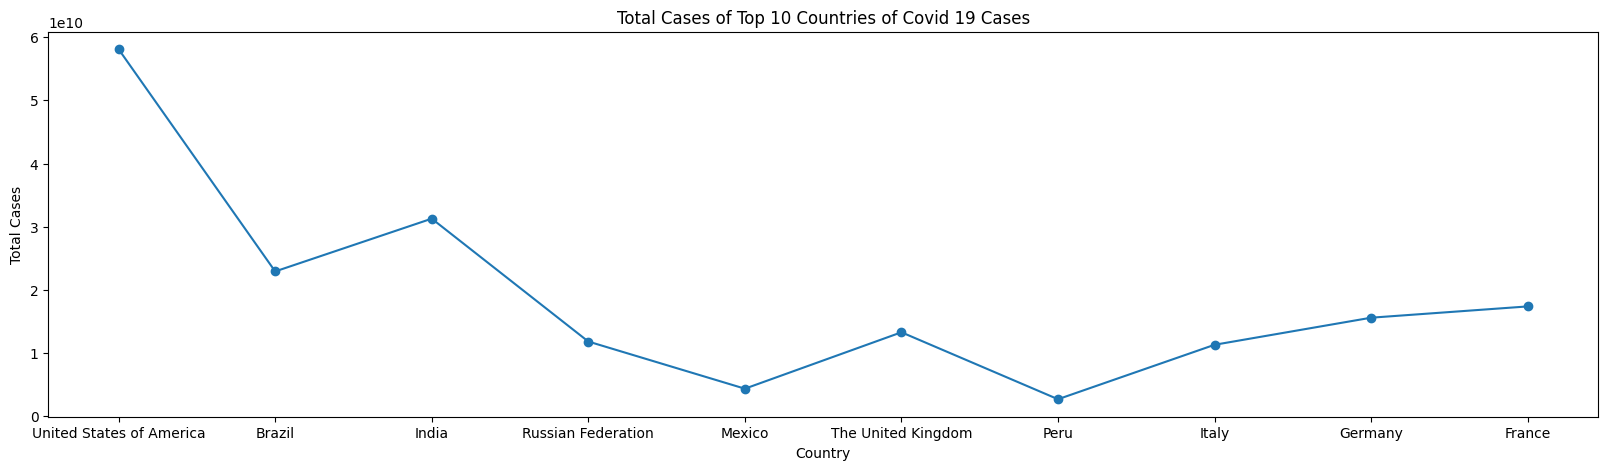

In [69]:
#top ten
# sort the dataframe by 'Total Cases' in descending order and select the top 10 countries

df_top10 = df_agg.head(10)
plt.figure(figsize=(20,5))
plt.plot(df_top10['Country'], df_top10['Total Cases'], marker='o')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Total Cases of Top 10 Countries of Covid 19 Cases')
plt.show()

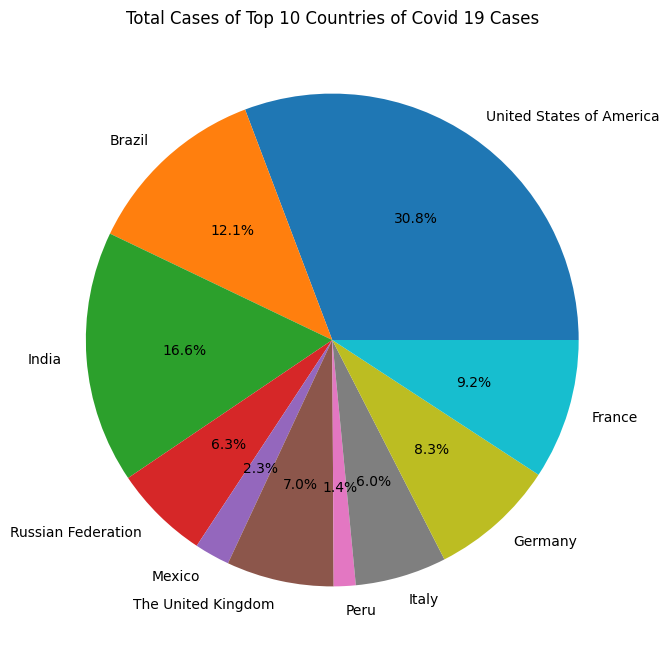

In [70]:
plt.figure(figsize=(8,8))
plt.pie(df_top10['Total Cases'], labels=df_top10['Country'], autopct='%1.1f%%')
plt.title('Total Cases of Top 10 Countries of Covid 19 Cases')
plt.show()

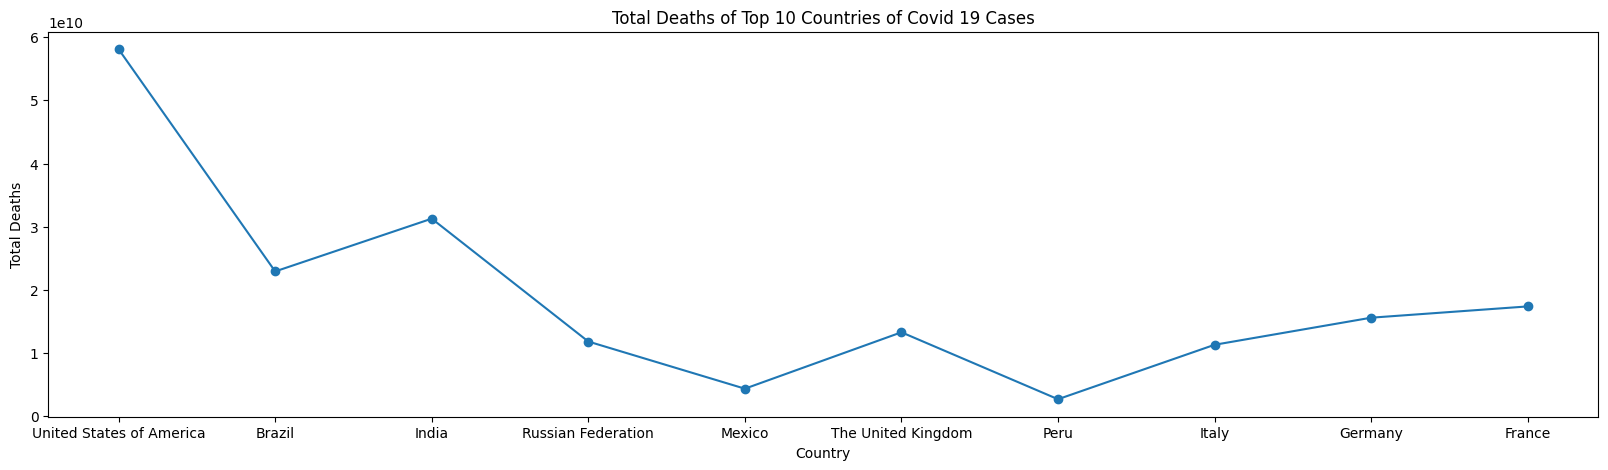

In [71]:
#top ten
# sort the dataframe by 'Total Cases' in descending order and select the top 10 countries

df_top10 = df_agg.head(10)
plt.figure(figsize=(20,5))
plt.plot(df_top10['Country'], df_top10['Total Cases'], marker='o')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Total Deaths of Top 10 Countries of Covid 19 Cases')
plt.show()

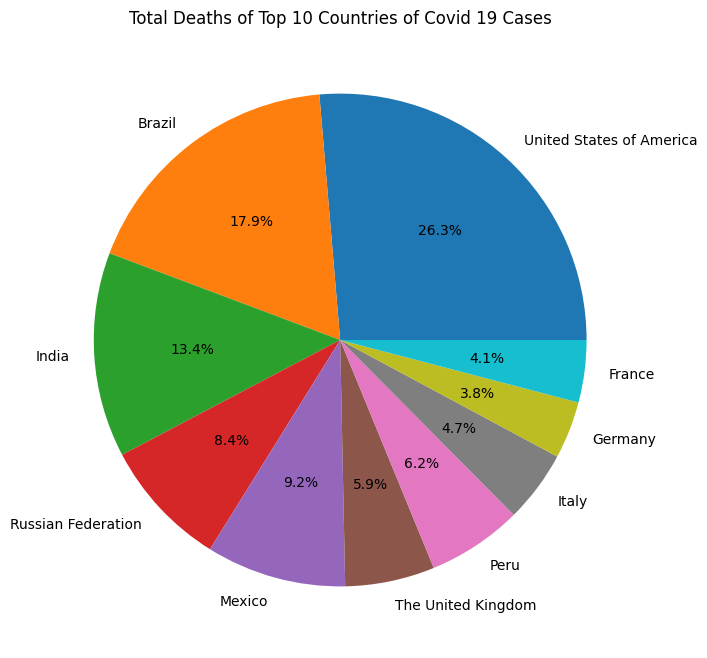

In [72]:
# plot the top 10 countries by 'Total Deaths' as a pie chart
plt.figure(figsize=(8,8))
plt.pie(df_top10['Total Deaths'], labels=df_top10['Country'], autopct='%1.1f%%')
plt.title('Total Deaths of Top 10 Countries of Covid 19 Cases')
plt.show()

In [73]:
df_filter_us = df[(df['Country'] == 'United States of America') ]
df_filter_us['year'] = pd.DatetimeIndex(df_filter_us['Date_reported']).year
df_filter_us = df_filter_us.groupby(['year'], as_index=False).sum()
df_filter_us.head()

<ipython-input-73-299003545d0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_us['year'] = pd.DatetimeIndex(df_filter_us['Date_reported']).year
<ipython-input-73-299003545d0e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_filter_us = df_filter_us.groupby(['year'], as_index=False).sum()


,year,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020,19577585,1699388140,352004,47094684
1,2021,33956701,13081418892,467051,223942585
2,2022,45877410,31397378136,263401,364931317
3,2023,3669757,11803843101,39363,128347924


In [75]:
df_filter_us['Total Cases'] = df_filter_us['New_cases'] + df_filter_us['Cumulative_cases']



df_filter_us['Total Deaths'] = df_filter_us['New_deaths'] + df_filter_us['Cumulative_deaths']

df_filter_us.head(10)

,year,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Total Cases,Total Deaths
0,2020,19577585,1699388140,352004,47094684,1718965725,47446688
1,2021,33956701,13081418892,467051,223942585,13115375593,224409636
2,2022,45877410,31397378136,263401,364931317,31443255546,365194718
3,2023,3669757,11803843101,39363,128347924,11807512858,128387287


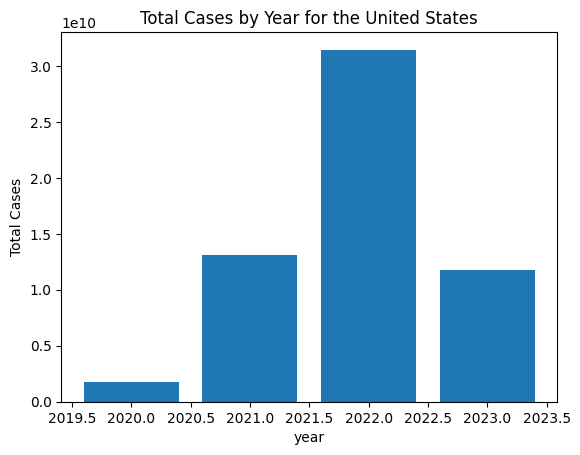

In [81]:
plt.bar(df_filter_us['year'], df_filter_us['Total Cases'])
plt.title('Total Cases by Year for the United States')
plt.xlabel('year')
plt.ylabel('Total Cases')
plt.show()

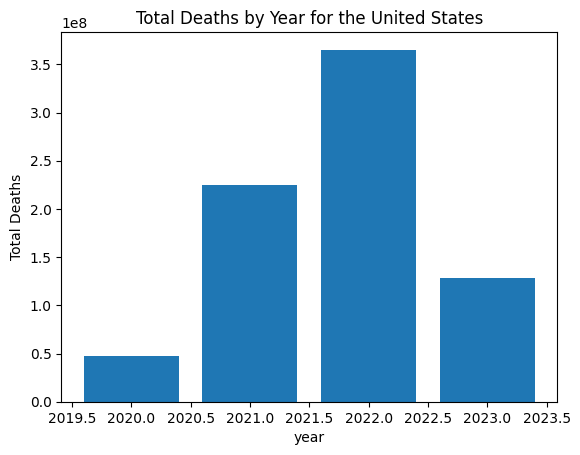

In [82]:
plt.bar(df_filter_us['year'], df_filter_us['Total Deaths'])
plt.title('Total Deaths by Year for the United States')
plt.xlabel('year')
plt.ylabel('Total Deaths')
plt.show()

In [83]:
df_filter_brazil = df[(df['Country'] == 'United States of America') ]
df_filter_brazil['year'] = pd.DatetimeIndex(df_filter_brazil['Date_reported']).year
df_filter_brazil = df_filter_brazil.groupby(['year'], as_index=False).sum()
df_filter_brazil.head()

<ipython-input-83-471099f6fc3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_brazil['year'] = pd.DatetimeIndex(df_filter_brazil['Date_reported']).year
<ipython-input-83-471099f6fc3d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_filter_brazil = df_filter_brazil.groupby(['year'], as_index=False).sum()


,year,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020,19577585,1699388140,352004,47094684
1,2021,33956701,13081418892,467051,223942585
2,2022,45877410,31397378136,263401,364931317
3,2023,3669757,11803843101,39363,128347924


In [84]:
df_filter_brazil['Total Cases'] = df_filter_brazil['New_cases'] + df_filter_brazil['Cumulative_cases']



df_filter_brazil['Total Deaths'] = df_filter_brazil['New_deaths'] + df_filter_brazil['Cumulative_deaths']

df_filter_brazil.head(10)

,year,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Total Cases,Total Deaths
0,2020,19577585,1699388140,352004,47094684,1718965725,47446688
1,2021,33956701,13081418892,467051,223942585,13115375593,224409636
2,2022,45877410,31397378136,263401,364931317,31443255546,365194718
3,2023,3669757,11803843101,39363,128347924,11807512858,128387287


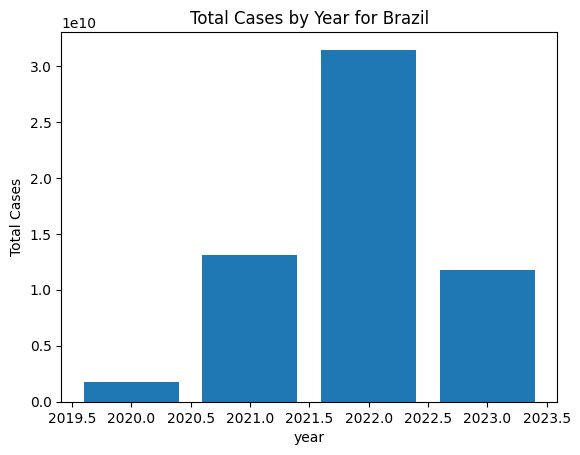

In [85]:
plt.bar(df_filter_brazil['year'], df_filter_brazil['Total Cases'])
plt.title('Total Cases by Year for Brazil')
plt.xlabel('year')
plt.ylabel('Total Cases')
plt.show()

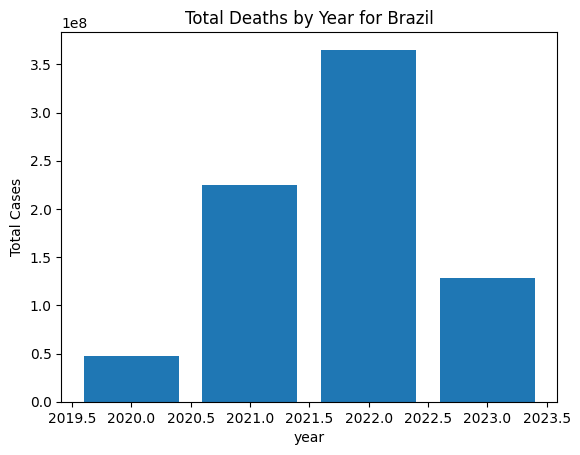

In [86]:
plt.bar(df_filter_brazil['year'], df_filter_brazil['Total Deaths'])
plt.title('Total Deaths by Year for Brazil')
plt.xlabel('year')
plt.ylabel('Total Cases')
plt.show()